In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import dist
import seaborn as sns

def pixel_to_image(pixel_value):

  test_in = pd.read_csv("/content/sample_data/data/test_in.csv",index_col=None)

  im = test_in.iloc[0].values.reshape((16,16))
  plt.imshow(im)

def no_index_read():
    def func(input:str):
        return pd.read_csv(input,index_col=None)
    return func
read_csv = no_index_read()
test_in = read_csv("/content/sample_data/data/test_in.csv")
test_out = read_csv("/content/sample_data/data/test_out.csv")
train_in = read_csv("/content/sample_data/data/train_in.csv")
train_out = read_csv("/content/sample_data/data/train_out.csv")

# CALCULATE CENTERS
digits = sorted(list(set(train_out.values.flatten())))
centers = {}
for d in digits:
    centers[d] = (train_in.iloc[(train_out == d).values].mean(axis=0)).to_numpy()

In [2]:
from scipy.spatial import distance


mean_vectors = list(centers.values())
train_in = list(train_in.values)
test_in = list(test_in.values)
train_out = list(train_out.values)
test_out = list(test_out.values)


In [3]:
#common functions for 1.3 and 1.4
from sklearn.metrics import accuracy_score, confusion_matrix

def get_accuracy_all(train_out, test_out,  train_out_predictions, test_out_predictions):
  train_accuracy = accuracy_score(train_out, train_out_predictions) * 100
  test_accuracy = accuracy_score(test_out, test_out_predictions) * 100
  return train_accuracy, test_accuracy

def show_confusion_matrix(test_out, test_pred, labels):
  conf_matrix = confusion_matrix(test_out, test_pred)
  conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", xticklabels=digits, yticklabels=digits)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show(block=False)

86.34232121922626
80.38038038038037


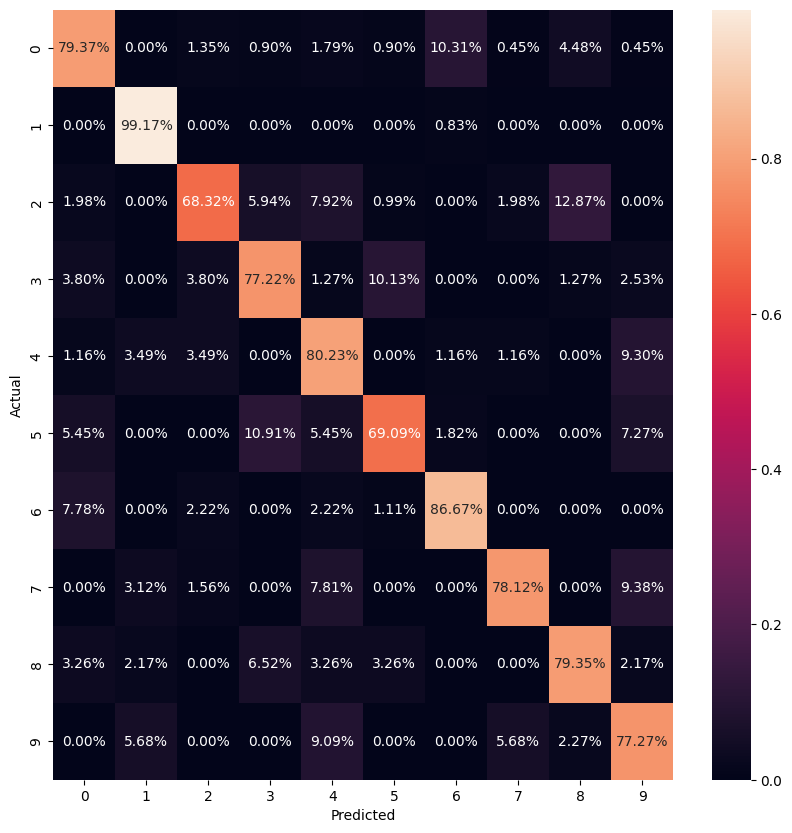

In [4]:

def nearest_mean_classifier(x,y):
    distances = distance.cdist(x, y, 'euclidean')
    min_distances_indexs = np.argmin(distances, axis=1)

    return min_distances_indexs



#for 1.3 question
train_out_predictions = nearest_mean_classifier(train_in,mean_vectors)
test_out_predictions = nearest_mean_classifier(test_in,mean_vectors)


train_accuracy, test_accuracy = get_accuracy_all(train_out, test_out, train_out_predictions, test_out_predictions)
print(train_accuracy)
print(test_accuracy)

show_confusion_matrix(test_out, test_out_predictions, digits)


86.34232121922626
80.38038038038037


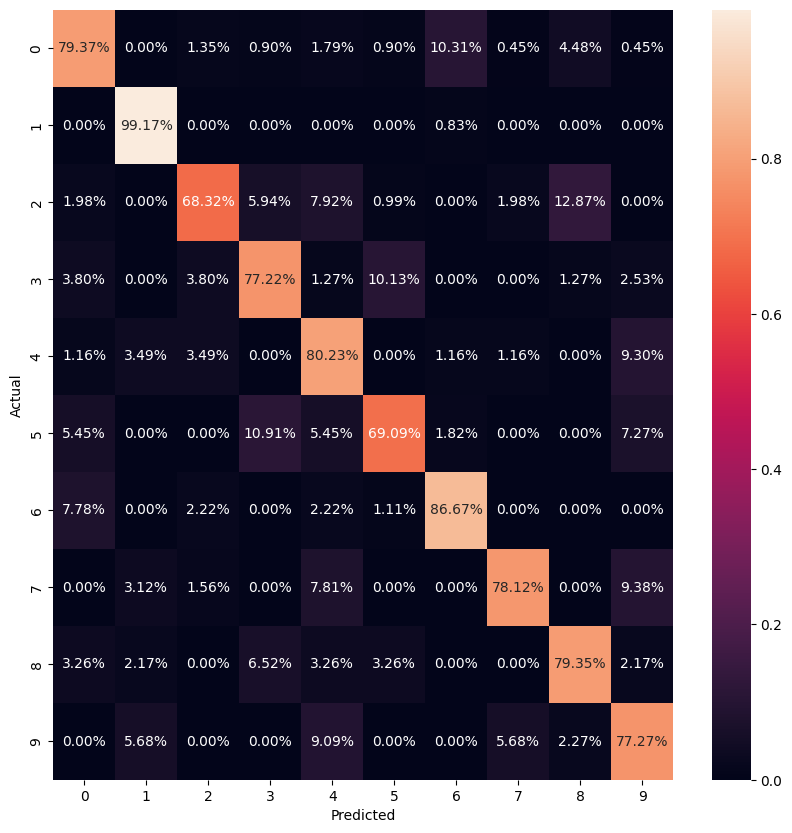

In [5]:
#for 1.4
from sklearn.neighbors import KNeighborsClassifier
def knn_classifier(x,y, k):
  #need to fit it based on mean vectors as mentioned in question
  neighbour = KNeighborsClassifier(n_neighbors= k)
  model = neighbour.fit(x, y)
  return model

def get_predictions(model, data):
  return model.predict(data)

model = knn_classifier(mean_vectors, digits, 1)

train_out_predictions = get_predictions(model, train_in)
test_out_predictions = get_predictions(model, test_in)

train_accuracy = accuracy_score(train_out, train_out_predictions) * 100
test_accuracy = accuracy_score(test_out, test_out_predictions) * 100

print(train_accuracy)
print(test_accuracy)
show_confusion_matrix(test_out, test_out_predictions, digits)